In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np

data = pd.read_csv('../full_data.csv')

In [2]:
impath = 'data/results/images/'

In [3]:
data

,station_id,year,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,percentage_docks_available,...,post_code,capacity,mm_precip,temperature,rating,ocio,carriles,time,festius,is_weekend
0,1.0,2020,1.0,1.0,2.0,0.522727,0.503788,0.469697,0.403409,0.354167,...,8013,45,0.00,5.75,6.0,88.0,6.0,2,1,0
1,1.0,2020,1.0,1.0,7.0,0.289773,0.373106,0.304924,0.238636,0.240530,...,8013,45,0.00,4.25,6.0,88.0,6.0,7,1,0
2,1.0,2020,1.0,1.0,12.0,0.253788,0.268939,0.350379,0.344697,0.393939,...,8013,45,0.00,12.45,6.0,88.0,6.0,12,1,0
3,1.0,2020,1.0,1.0,17.0,0.390152,0.346591,0.255814,0.220930,0.186047,...,8013,45,0.00,9.35,6.0,88.0,6.0,17,1,0
4,1.0,2020,1.0,1.0,22.0,0.083333,0.218992,0.437984,0.515504,0.470930,...,8013,45,0.00,6.80,6.0,88.0,6.0,22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446893,496.0,2024,3.0,31.0,1.0,0.828704,0.787037,0.777778,0.853535,NaN,...,8025,18,0.00,14.35,9.0,64.0,1.0,37225,0,1
3446894,496.0,2024,3.0,31.0,6.0,0.930556,0.944444,0.935185,0.856481,NaN,...,8025,18,0.00,15.10,9.0,64.0,1.0,37230,0,1
3446895,496.0,2024,3.0,31.0,11.0,0.912037,0.884259,0.518519,0.157407,NaN,...,8025,18,0.00,14.55,9.0,64.0,1.0,37235,0,1
3446896,496.0,2024,3.0,31.0,16.0,0.245370,0.319444,0.277778,0.305556,NaN,...,8025,18,0.35,12.75,9.0,64.0,1.0,37240,0,1


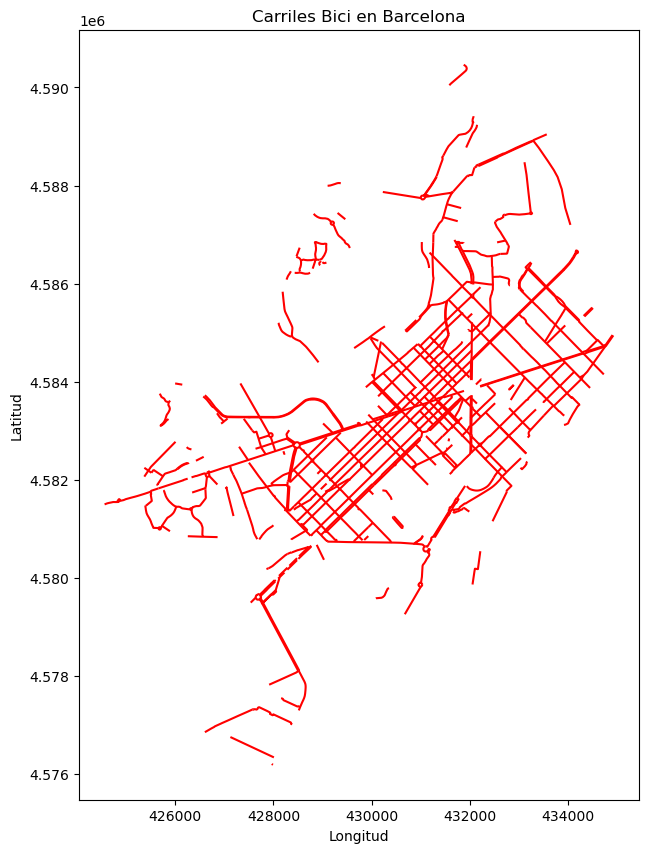

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al archivo shapefile descargado

codigos_postales_bcn = np.unique('0' + data['post_code'].astype(int).astype(str))

fig, ax = plt.subplots(figsize = (12,10))
'''
shapefile_path = 'data/locations_data/geo_data/codigos_postales.shp'
gdf = gpd.read_file(shapefile_path)
poligs_bcn = gdf[gdf['COD_POSTAL'].isin(codigos_postales_bcn)]
locations = pd.read_csv('data/locations_data/barna_pics.csv', encoding = 'utf-16').groupby('addresses_zip_code').size().reset_index()
locations.columns = ['addresses_zip_code', 'rating']
locations['addresses_zip_code'] = '0'+locations['addresses_zip_code'].astype(str)
poligs_bcn_locs = pd.merge(poligs_bcn, locations, left_on = 'COD_POSTAL', right_on = 'addresses_zip_code')

poligs_bcn_locs.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'rating', cmap = 'Reds', legend = True)
'''
# Cargar el shapefile en un GeoDataFrame
shapefile_path = 'data/locations_data/2024_1T_CARRIL_BICI/2024_1T_CARRIL_BICI.shp'
gdfcarriles = gpd.read_file(shapefile_path)

# Visualizar el GeoDataFrame

# Graficar los polígonos

gdfcarriles.plot(color ='red', ax = ax)
plt.title('Carriles Bici en Barcelona')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

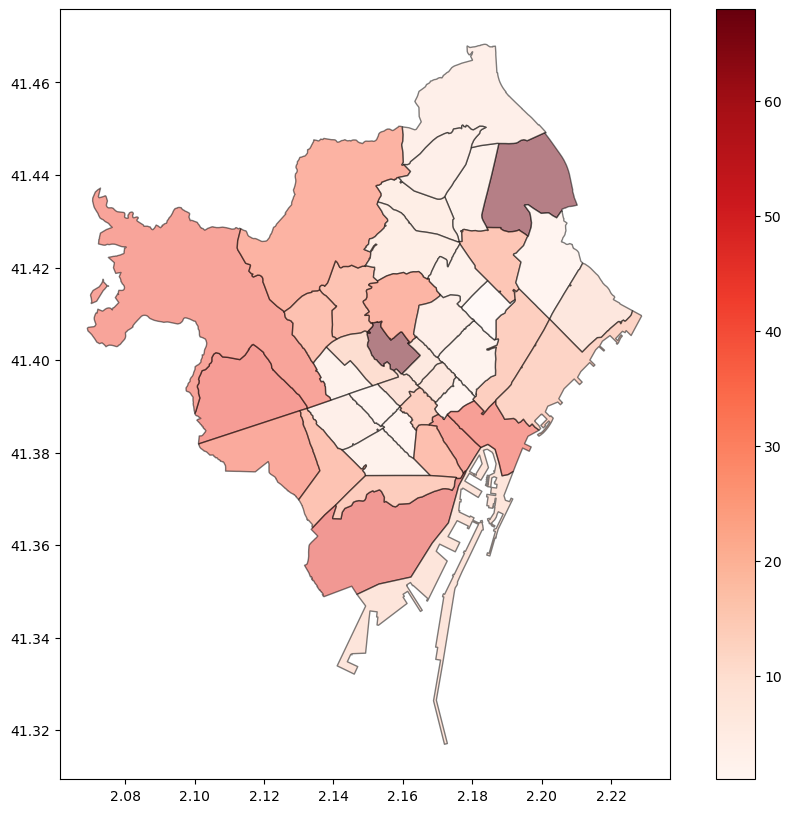

In [6]:
fig, ax = plt.subplots(figsize = (12,10))
shapefile_path = 'data/locations_data/geo_data/codigos_postales.shp'
gdf = gpd.read_file(shapefile_path)
poligs_bcn = gdf[gdf['COD_POSTAL'].isin(codigos_postales_bcn)]
locations = pd.read_csv('data/locations_data/barna_pics.csv', encoding = 'utf-16').groupby('addresses_zip_code').size().reset_index()
locations.columns = ['addresses_zip_code', 'rating']
locations['addresses_zip_code'] = '0'+locations['addresses_zip_code'].astype(str)
poligs_bcn_locs = pd.merge(poligs_bcn, locations, left_on = 'COD_POSTAL', right_on = 'addresses_zip_code')

poligs_bcn_locs.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'rating', cmap = 'Reds', legend = True)
plt.show()

In [12]:
if gdfcarriles.crs != poligs_bcn_locs.crs:
    gdfcarriles = gdfcarriles.to_crs(poligs_bcn_locs.crs)

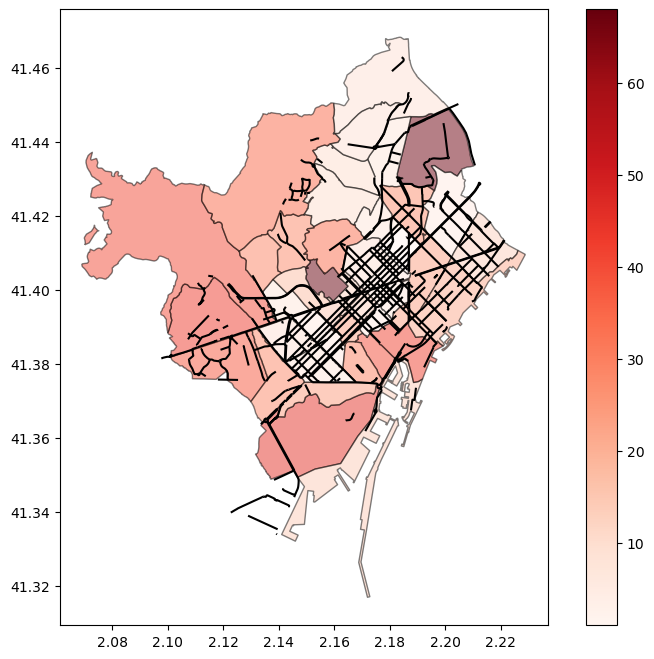

In [19]:
# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Graficar los carriles bici
gdfcarriles.plot(ax=ax, color='black')

# Guardar los límites del eje
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Graficar los distritos con el mapa de calor
poligs_bcn_locs.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'rating', cmap = 'Reds', legend = True)

# Mostrar las figuras
plt.show()

In [25]:
carriles_bici = data[['post_code', 'carriles']].groupby(['post_code', 'carriles']).sum().reset_index()
carriles_bici['post_code'] = '0'+carriles_bici['post_code'].astype(int).astype(str)
carriles_bici = pd.merge(poligs_bcn, carriles_bici, left_on = 'COD_POSTAL', right_on = 'post_code')
carriles_bici.head()

,ID_CP,COD_POSTAL,ALTA_DB,CODIGO_INE,geometry,post_code,carriles
0,80190000032,08011,2015-07-09,8019,"POLYGON ((2.15719 41.38274, 2.15722 41.38289, ...",08011,3.0
1,80190000033,08002,2015-07-09,8019,"POLYGON ((2.17281 41.38821, 2.17433 41.38705, ...",08002,1.0
2,80190000034,08001,2015-07-09,8019,"POLYGON ((2.16767 41.38594, 2.16981 41.38569, ...",08001,3.0
3,80190000035,08021,2015-07-09,8019,"POLYGON ((2.13793 41.40284, 2.14321 41.39888, ...",08021,3.0
4,80190000036,08029,2015-07-09,8019,"POLYGON ((2.14826 41.38963, 2.15014 41.38821, ...",08029,2.0


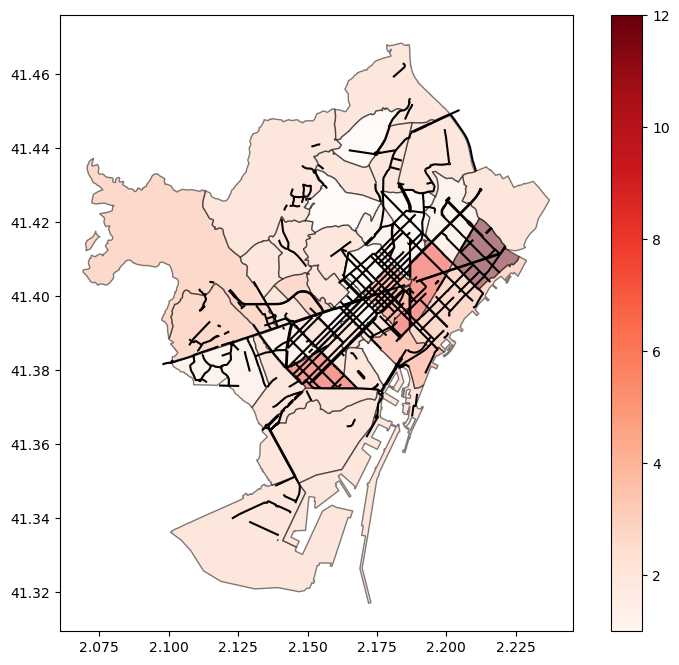

In [27]:
# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Graficar los carriles bici
gdfcarriles.plot(ax=ax, color='black')

# Guardar los límites del eje
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Graficar los distritos con el mapa de calor
carriles_bici.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'carriles', cmap = 'Reds', legend = True)

# Mostrar las figuras
plt.show()

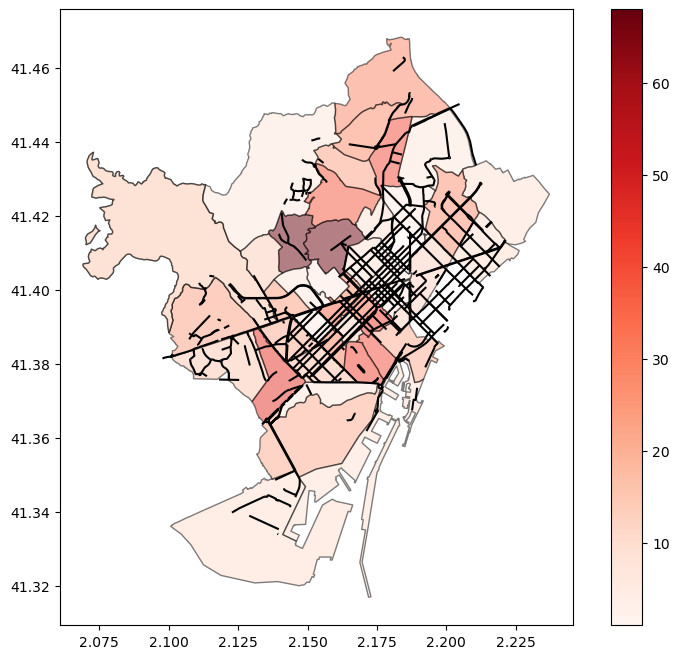

In [29]:
rating = data[['post_code', 'rating']].groupby(['post_code', 'rating']).sum().reset_index()
rating['post_code'] = '0'+carriles_bici['post_code'].astype(int).astype(str)
rating = pd.merge(poligs_bcn, rating, left_on = 'COD_POSTAL', right_on = 'post_code')
rating.head()
# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Graficar los carriles bici
gdfcarriles.plot(ax=ax, color='black')

# Guardar los límites del eje
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Graficar los distritos con el mapa de calor
rating.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'rating', cmap = 'Reds', legend = True)

# Mostrar las figuras
plt.show()

In [37]:
data_com = data[data['year'].isin([2020,2021,2022,2024])]
cols = ['percentage_docks_available','rating','post_code','ocio','carriles']
cols_group = ['rating','post_code','ocio','carriles']
mean_avilability = data_com[cols].groupby(cols_group).mean().reset_index()
mean_avilability['post_code'] = '0' + mean_avilability['post_code'].astype(int).astype(str)
mean_avilability = pd.merge(poligs_bcn, mean_avilability, left_on = 'COD_POSTAL', right_on = 'post_code')
mean_avilability.head()

,ID_CP,COD_POSTAL,ALTA_DB,CODIGO_INE,geometry,rating,post_code,ocio,carriles,percentage_docks_available
0,80190000032,08011,2015-07-09,8019,"POLYGON ((2.15719 41.38274, 2.15722 41.38289, ...",5.0,08011,46.0,3.0,0.590769
1,80190000033,08002,2015-07-09,8019,"POLYGON ((2.17281 41.38821, 2.17433 41.38705, ...",40.0,08002,119.0,1.0,0.467196
2,80190000034,08001,2015-07-09,8019,"POLYGON ((2.16767 41.38594, 2.16981 41.38569, ...",30.0,08001,151.0,3.0,0.466158
3,80190000035,08021,2015-07-09,8019,"POLYGON ((2.13793 41.40284, 2.14321 41.39888, ...",7.0,08021,34.0,3.0,0.776919
4,80190000036,08029,2015-07-09,8019,"POLYGON ((2.14826 41.38963, 2.15014 41.38821, ...",9.0,08029,64.0,2.0,0.745256


In [41]:
import matplotlib.cm as cm

/var/folders/gt/v7xq73cx0nj74cmjgsw8ql_00000gn/T/ipykernel_94518/3969975252.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


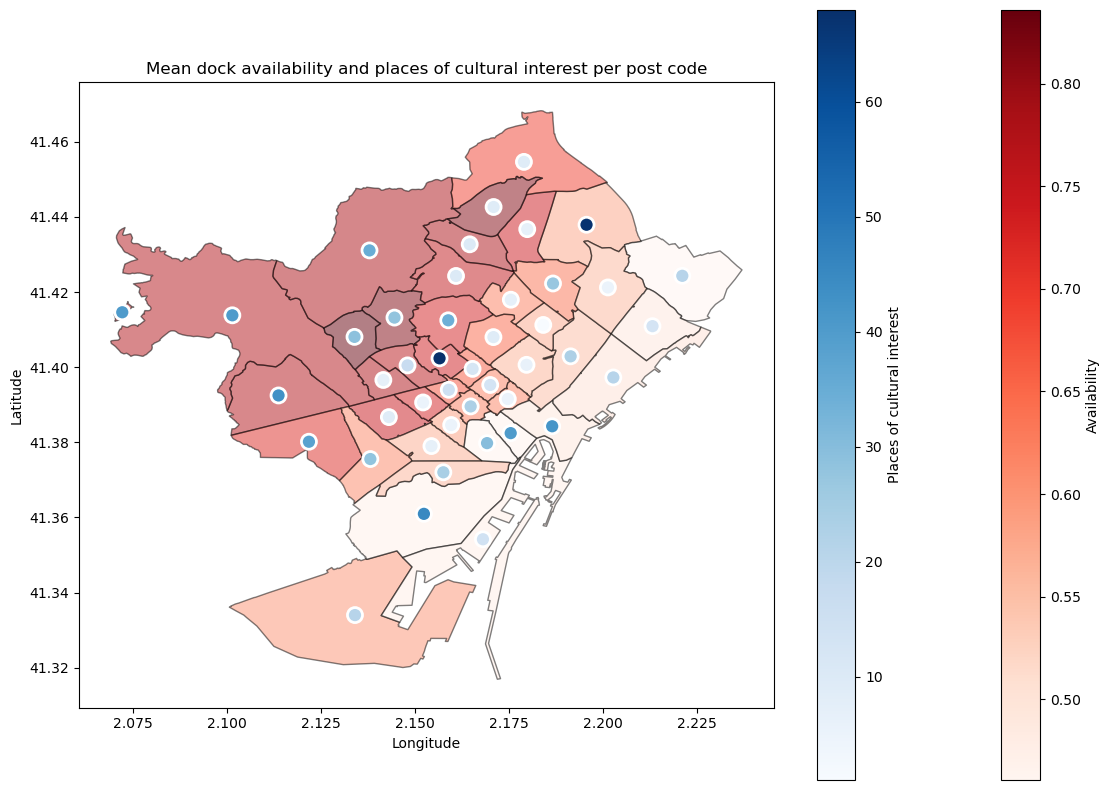

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
mean_avilability.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'percentage_docks_available', cmap = 'Reds', legend = True, legend_kwds={'label': "Availability"})
norm = plt.Normalize(mean_avilability['rating'].min(), mean_avilability['rating'].max())
cmap = cm.get_cmap('Blues')

# Agregar pelotitas en el centro de cada polígono con un gradiente de color azul según el valor de rating
for idx, row in mean_avilability.iterrows():
    centroid = row['geometry'].centroid
    rating = row['rating']
    color = cmap(norm(rating))
    circle = plt.Circle((centroid.x, centroid.y), 0.002, color=color, ec='white', lw=2, zorder=1)
    ax.add_patch(circle)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Agregar una barra de color al lado
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Places of cultural interest')
ax.set_aspect('equal')
# Mostrar las figuras
plt.title('Mean dock availability and places of cultural interest per post code')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/var/folders/gt/v7xq73cx0nj74cmjgsw8ql_00000gn/T/ipykernel_94518/2860323962.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Greens')


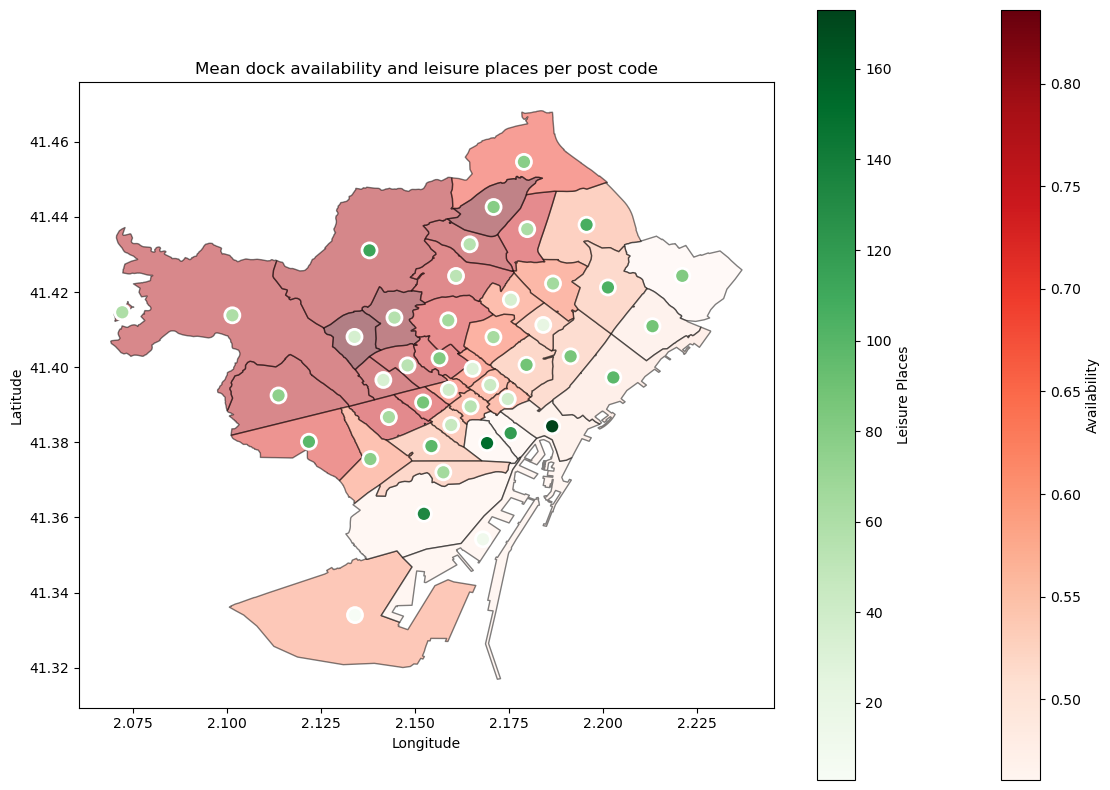

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
mean_avilability.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'percentage_docks_available', cmap = 'Reds', legend = True, legend_kwds={'label': "Availability"})
norm = plt.Normalize(mean_avilability['ocio'].min(), mean_avilability['ocio'].max())
cmap = cm.get_cmap('Greens')

# Agregar pelotitas en el centro de cada polígono con un gradiente de color azul según el valor de rating
for idx, row in mean_avilability.iterrows():
    centroid = row['geometry'].centroid
    rating = row['ocio']
    color = cmap(norm(rating))
    circle = plt.Circle((centroid.x, centroid.y), 0.002, color=color, ec='white', lw=2, zorder=1)
    ax.add_patch(circle)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Agregar una barra de color al lado
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Leisure Places')
ax.set_aspect('equal')
# Mostrar las figuras
plt.title('Mean dock availability and leisure places per post code')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/var/folders/gt/v7xq73cx0nj74cmjgsw8ql_00000gn/T/ipykernel_94518/2470741465.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Purples')


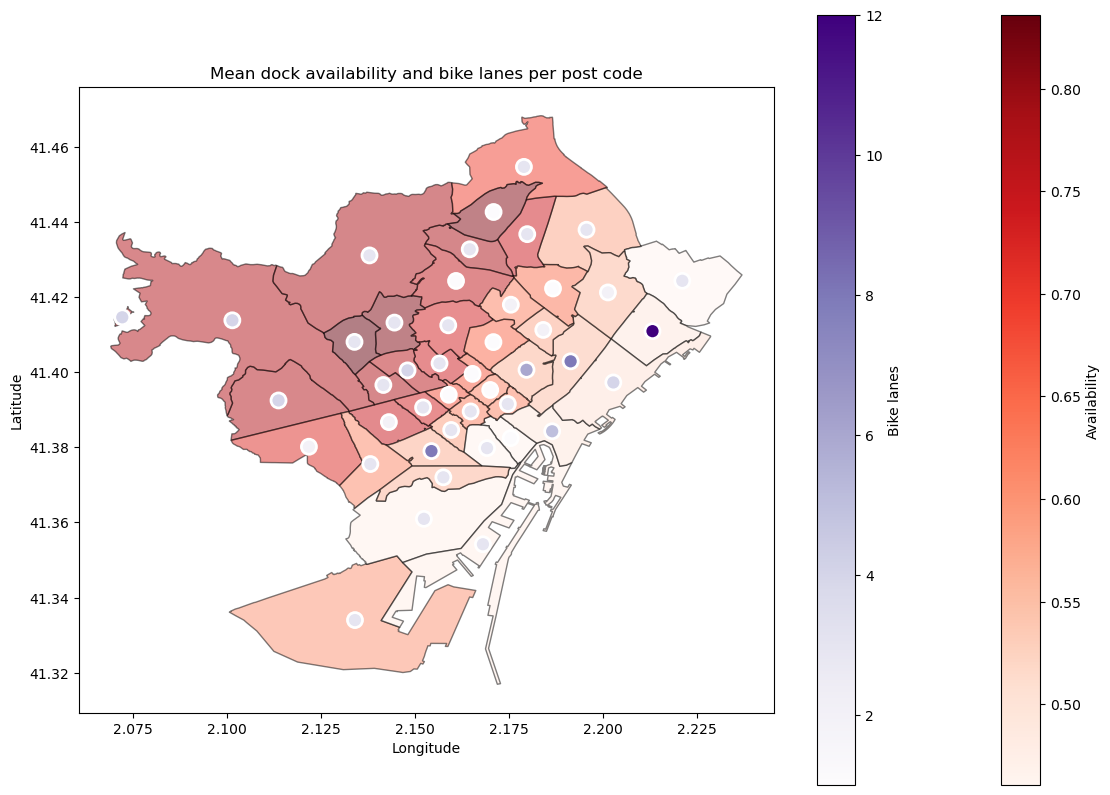

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
mean_avilability.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'percentage_docks_available', cmap = 'Reds', legend = True, legend_kwds={'label': "Availability"})
norm = plt.Normalize(mean_avilability['carriles'].min(), mean_avilability['carriles'].max())
cmap = cm.get_cmap('Purples')

# Agregar pelotitas en el centro de cada polígono con un gradiente de color azul según el valor de rating
for idx, row in mean_avilability.iterrows():
    centroid = row['geometry'].centroid
    rating = row['carriles']
    color = cmap(norm(rating))
    circle = plt.Circle((centroid.x, centroid.y), 0.002, color=color, ec='white', lw=2, zorder=1)
    ax.add_patch(circle)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Agregar una barra de color al lado
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Bike lanes')
ax.set_aspect('equal')
# Mostrar las figuras
plt.title('Mean dock availability and bike lanes per post code')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()